# **Exploratory Data Analysis (EDA) for Movie Dataset**

## **Dataset Overview**
This dataset contains information about movies, including their unique identifiers, titles, release years, runtime, votes, and labels. Our goal is to explore the dataset to understand its structure, identify missing values, and analyze distributions before data cleaning.

## **Column Descriptions**
- `tconst` (string) - Unique identifier for each movie.
- `primaryTitle` (string) - The main title of the movie.
- `originalTitle` (string) - The original title (if different from primary).
- `startYear` (integer) - The year the movie was released.
- `endYear` (integer, nullable) - The year the movie series ended (if applicable).
- `runtimeMinutes` (integer) - Duration of the movie in minutes.
- `numVotes` (integer) - Number of votes received.
- `label` (categorical) - Label/classification of the movie.

In [ ]:
import pandas as pd
import datetime 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import unicodedata
import string
from IPython.display import display
import importlib
import utilities  
importlib.reload(utilities)

In [31]:
train_df = utilities.load_and_merge_train_data()
train_df.head(5)

,tconst,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,numVotes,label
0,tt0015224,Peter Pan,NaN,1924,\N,105,1042.0,True
1,tt0015864,The Gold Rush,NaN,1925,\N,95,107475.0,True
2,tt0016029,The Little Colonel,NaN,1935,\N,81,1646.0,True
3,tt0021309,The Story of the Fox,Le roman de Renard,1937,\N,63,NaN,True
4,tt0022395,The Skin Game,NaN,1931,\N,85,NaN,False


### **Below all dimensions are evaluated**


    tconst (string) - alphanumeric unique identifier of the title
    titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
    primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
    originalTitle (string) - original title, in the original language
    isAdult (boolean) - 0: non-adult title; 1: adult title
    startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
    endYear (YYYY) – TV Series end year. '\N' for all other title types
    runtimeMinutes – primary runtime of the title, in minutes
    genres (string array) – includes up to three genres associated with the title


| **Dimension**            | **Analysis Performed** |
|--------------------------|-----------------------|
| **Completeness**         | Count missing values |
| **Consistency (Intra-relation)** | Check ranges for numerical data |
| **Consistency (Inter-relation)** | Check categorical values |
| **Syntactic Accuracy**   | Convert data types and formats |
| **Semantic Accuracy**    | Check if values make sense in real-world context |
| **Error Handling**       | Duplicates, typos, outliers mitigation |

---

### ** Summary of Data Quality Findings**
- **Missing Data: ['\\n', 'nan', 'null', 'none', '-', '?', ''] or actual missing data**  
  - `originalTitle` has **50.11% missing values**.  
  - `numVotes` has **9.93% missing values**. 
  - `endYear` has **90.12% missing values however according to IMDB documentation endYear is only applicable to TV series. We lack of that column, we can't be confident that that data is imcomplete and we can't prove otherwise as well**.
  - `startYear` has **9.88% missing values. We have either start or eand year, not both at once**
  - `runtimeMinutes` has **0.16% missing values**

- **Numerical Data Consistency:** 
- `numVotes` has has a wide range of values (some may be incorrect, but top votes are True -> so we don't need to drop them and instead just either use Random Forest that can handle skewed data or):  
- `runtimeMinutes` has a wide range of values (some may be incorrect):

- **Categorical Data Consistency:** 
- `label` is a **boolean column** (expected True/False)
- `startYear`, `endYear` should be integers but are stored as **object type**. 
- **Syntactic Accuracy:** 
- `startYear`, `endYear`, `runtimeMinutes` need conversion from **object → numeric**. 
- `\N` values in `endYear` indicate missing values that need replacement. 
- **Semantic Accuracy:** 
- `startYear` should range **within valid years**, needs verification. 
- Some `runtimeMinutes` values are suspicious (extremely low or high). After check - seem to be true
- **Error Handling:** 
- `tconst` is **unique (no duplicates, 100% valid)**. 

---

### ** Next Steps: Data Cleaning & Mitigation**
- **Fix Missing Data** 
- Replace `\N` values in `startYear` with values in`endYear` or `NaN`. 
- **Fix Data Types** 
- Convert `startYear`, `endYear`, `numVotes`, and `runtimeMinutes` from `object` to `integer`. 
- **Handle Duplicates** 
- Ensure `tconst` remains unique. 
- **Detect and Remove Outliers** 




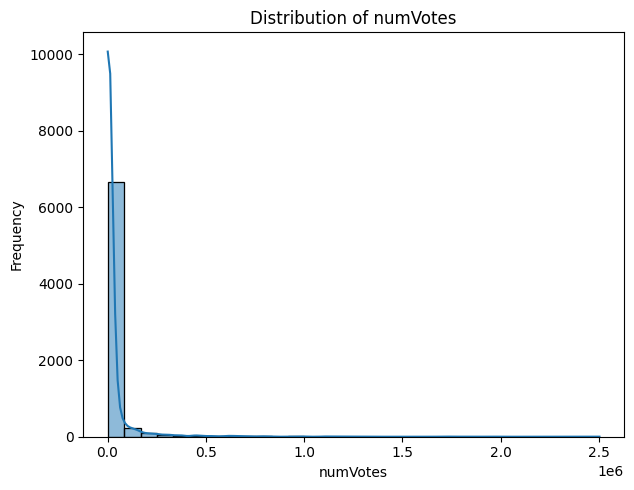

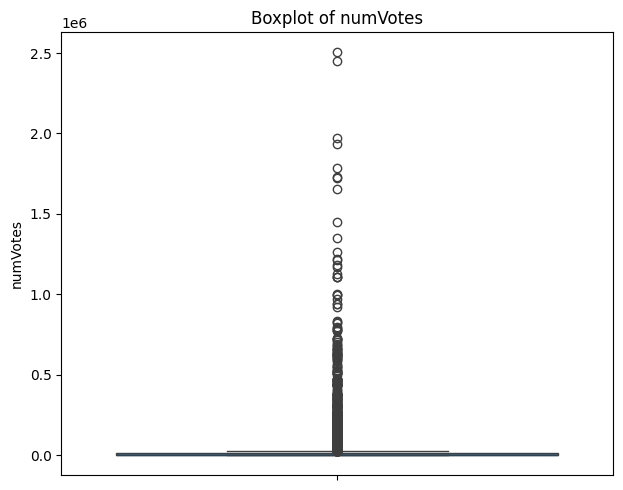

,Column,Data Type,Total Values,Missing Values,Missing %,Unique Values,Duplicate Count,IQR Outliers,MAD Outliers,Trimmed Mean,Sample Values
0,endYear,object,7959,7173,90.12,92,694,N/A,N/A,N/A,"[1931, 1933, 1940, 1942, 1946]"
1,originalTitle,object,7959,3988,50.11,3944,27,N/A,N/A,N/A,"[le roman de renard, waterloo bridge, little w..."
2,numVotes,float64,7959,790,9.93,5118,2051,1098,1916,7503.502702,"[1042.0, 107475.0, 1646.0, 1364.0, 2828.0]"
3,startYear,object,7959,786,9.88,104,7069,N/A,N/A,N/A,"[1924, 1925, 1935, 1937, 1931]"
4,runtimeMinutes,object,7959,13,0.16,185,7761,N/A,N/A,N/A,"[105, 95, 81, 63, 85]"
5,primaryTitle,object,7959,0,0.00,7845,114,N/A,N/A,N/A,"[peter pan, the gold rush, the little colonel,..."
6,tconst,object,7959,0,0.00,7959,0,N/A,N/A,N/A,"[tt0015224, tt0015864, tt0016029, tt0021309, t..."
7,label,bool,7959,0,0.00,2,7957,N/A,N/A,N/A,"[True, False]"


In [32]:
data_quality_report = utilities.analyze_data_quality(train_df)

display(data_quality_report)


In [33]:
df_cleaned_v1 = utilities.clean_data(train_df)
df_cleaned_v1.head(5)

,tconst,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,numVotes,label
0,tt0015224,peter pan,<NA>,1924,<NA>,105,1042,True
1,tt0015864,the gold rush,<NA>,1925,<NA>,95,107475,True
2,tt0016029,the little colonel,<NA>,1935,<NA>,81,1646,True
3,tt0021309,the story of the fox,le roman de renard,1937,<NA>,63,<NA>,True
4,tt0022395,the skin game,<NA>,1931,<NA>,85,<NA>,False


In [34]:
missing_rows = df_cleaned_v1[df_cleaned_v1['runtimeMinutes'].isna()]
    
matching_records = train_df[train_df['tconst'].isin(missing_rows['tconst'])]
matching_records

,tconst,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,numVotes,label
403,tt0307692,zapata - el sueño del héroe,zapata - el sueño del héroe,2004,<NA>,<NA>,1050.0,False
649,tt1601798,allare allari,allare allari,2007,<NA>,<NA>,1233.0,False
811,tt3746920,hayat sana güzel,hayat sana güzel,2014,<NA>,<NA>,1074.0,False
1454,tt0327419,amir el zalam,amir el zalam,2002,<NA>,<NA>,1567.0,False
2667,tt14868676,ravana lanka,<NA>,2021,<NA>,<NA>,NaN,True
3440,tt0423087,rớk sákớ tớ rớk lớ,<NA>,2004,<NA>,<NA>,1859.0,False
3530,tt1048144,andaleeb el dokki,andaleeb aldokki,2008,<NA>,<NA>,1158.0,False
4660,tt15458036,savitri w/o satyamurthy,<NA>,2021,<NA>,<NA>,1027.0,False
5591,tt13624868,udumb,udumb,2021,<NA>,<NA>,1024.0,True
5823,tt4624768,evil nature,<NA>,2018,<NA>,<NA>,3239.0,True


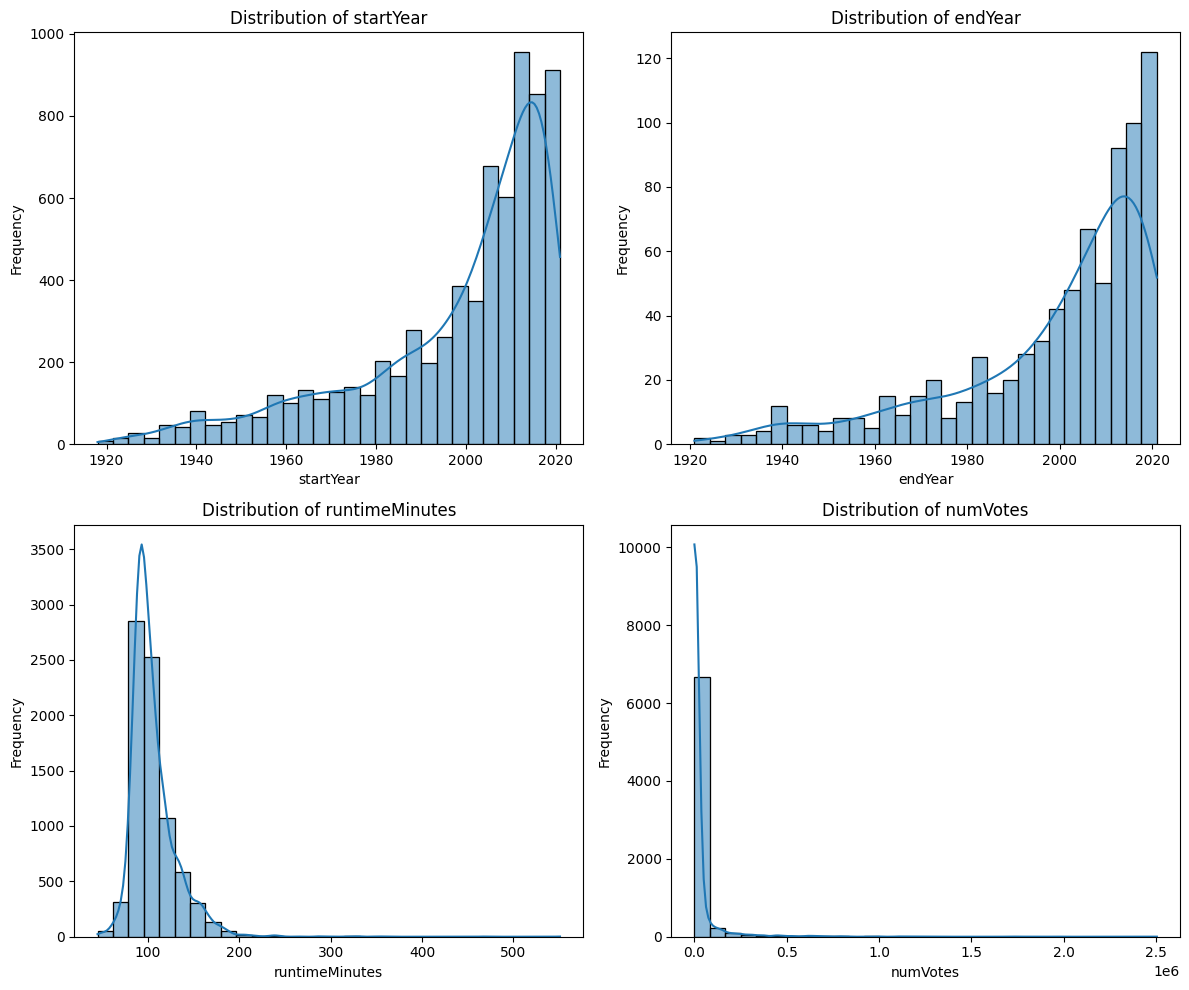

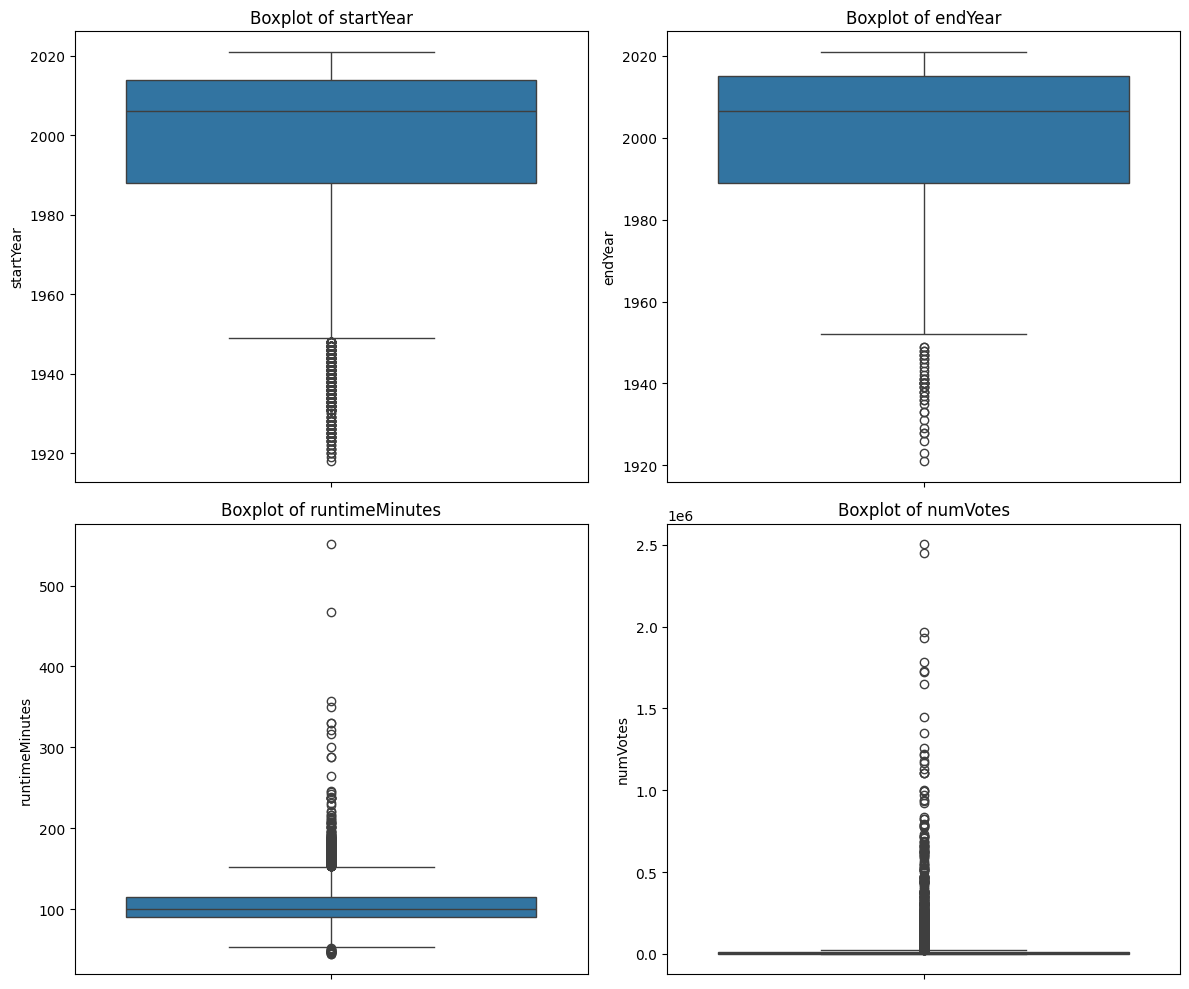

,Column,Data Type,Total Values,Missing Values,Missing %,Unique Values,Duplicate Count,IQR Outliers,MAD Outliers,Trimmed Mean,Sample Values
0,endYear,Int64,7959,7173,90.12,92,694,41,121,2002.426984,"[1931, 1933, 1940, 1942, 1946]"
1,originalTitle,string[python],7959,3988,50.11,3944,27,N/A,N/A,N/A,"[le roman de renard, waterloo bridge, little w..."
2,numVotes,Int64,7959,790,9.93,5118,2051,1098,1916,7503.502702,"[1042, 107475, 1646, 1364, 2828]"
3,startYear,Int64,7959,786,9.88,104,7069,337,1166,2001.564558,"[1924, 1925, 1935, 1937, 1931]"
4,runtimeMinutes,Int64,7959,13,0.16,185,7761,448,1061,102.495282,"[105, 95, 81, 63, 85]"
5,primaryTitle,string[python],7959,0,0.00,7845,114,N/A,N/A,N/A,"[peter pan, the gold rush, the little colonel,..."
6,tconst,string[python],7959,0,0.00,7959,0,N/A,N/A,N/A,"[tt0015224, tt0015864, tt0016029, tt0021309, t..."
7,label,bool,7959,0,0.00,2,7957,N/A,N/A,N/A,"[True, False]"


In [35]:
data_quality_report = utilities.analyze_data_quality(df_cleaned_v1)

display(data_quality_report)

In [ ]:
utilities.plot_numeric_counts(df_cleaned_v1, 'startYear')

In [ ]:
utilities.plot_numeric_counts(df_cleaned_v1, 'endYear')

In [38]:
df_cleaned_v2 = df_cleaned_v1.copy()

df_cleaned_v2['releaseYear'] = df_cleaned_v2.apply(
    lambda row: row['startYear'] if not pd.isna(row['startYear']) else row['endYear'],
    axis=1
)

# Convert 'releaseYear' to numeric, coerce invalid strings to NaN
df_cleaned_v2['releaseYear'] = pd.to_numeric(df_cleaned_v2['releaseYear'], errors='coerce')
df_cleaned_v2['releaseYear'] = df_cleaned_v2['releaseYear'].astype(int)

# Replace out-of-range years with the current year
min_year = 1890
current_year = datetime.date.today().year
df_cleaned_v2.loc[df_cleaned_v2['releaseYear'] < min_year, 'releaseYear'] = current_year
df_cleaned_v2.loc[df_cleaned_v2['releaseYear'] > current_year, 'releaseYear'] = current_year

# 7) Drop old columns
df_cleaned_v2.drop(columns=['startYear', 'endYear'], inplace=True)

df_cleaned_v2.head(10)

,tconst,primaryTitle,originalTitle,runtimeMinutes,numVotes,label,releaseYear
0,tt0015224,peter pan,<NA>,105,1042,True,1924
1,tt0015864,the gold rush,<NA>,95,107475,True,1925
2,tt0016029,the little colonel,<NA>,81,1646,True,1935
3,tt0021309,the story of the fox,le roman de renard,63,<NA>,True,1937
4,tt0022395,the skin game,<NA>,85,<NA>,False,1931
5,tt0022485,tokyo chorus,<NA>,90,1364,True,1931
6,tt0022550,waterloo bridge,waterloo bridge,81,2828,True,1931
7,tt0022802,the dark horse,<NA>,75,1232,True,1932
8,tt0022913,freaks,<NA>,64,44794,True,1932
9,tt0023634,"i wás bớrn, bút...",<NA>,100,5332,True,1932


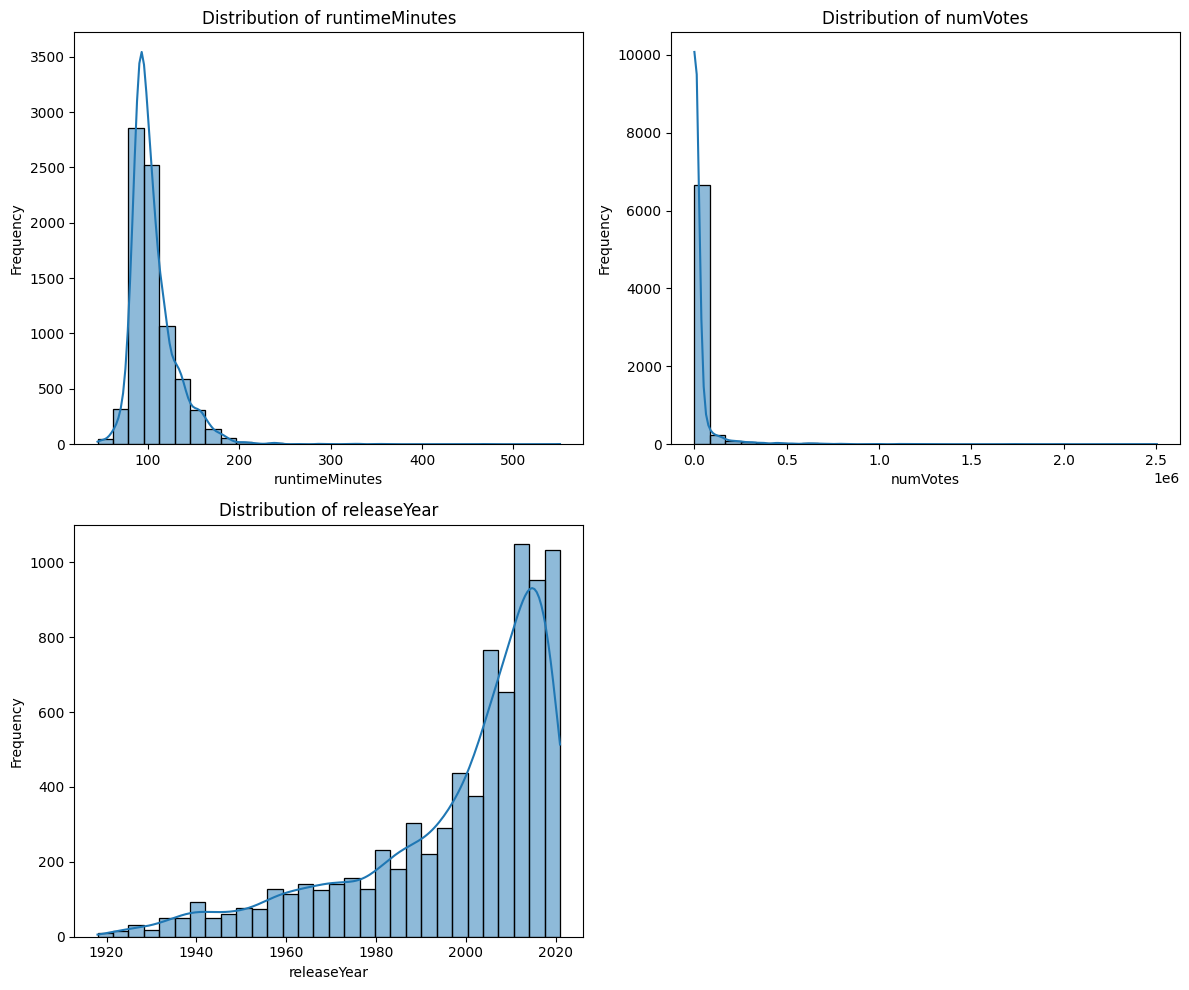

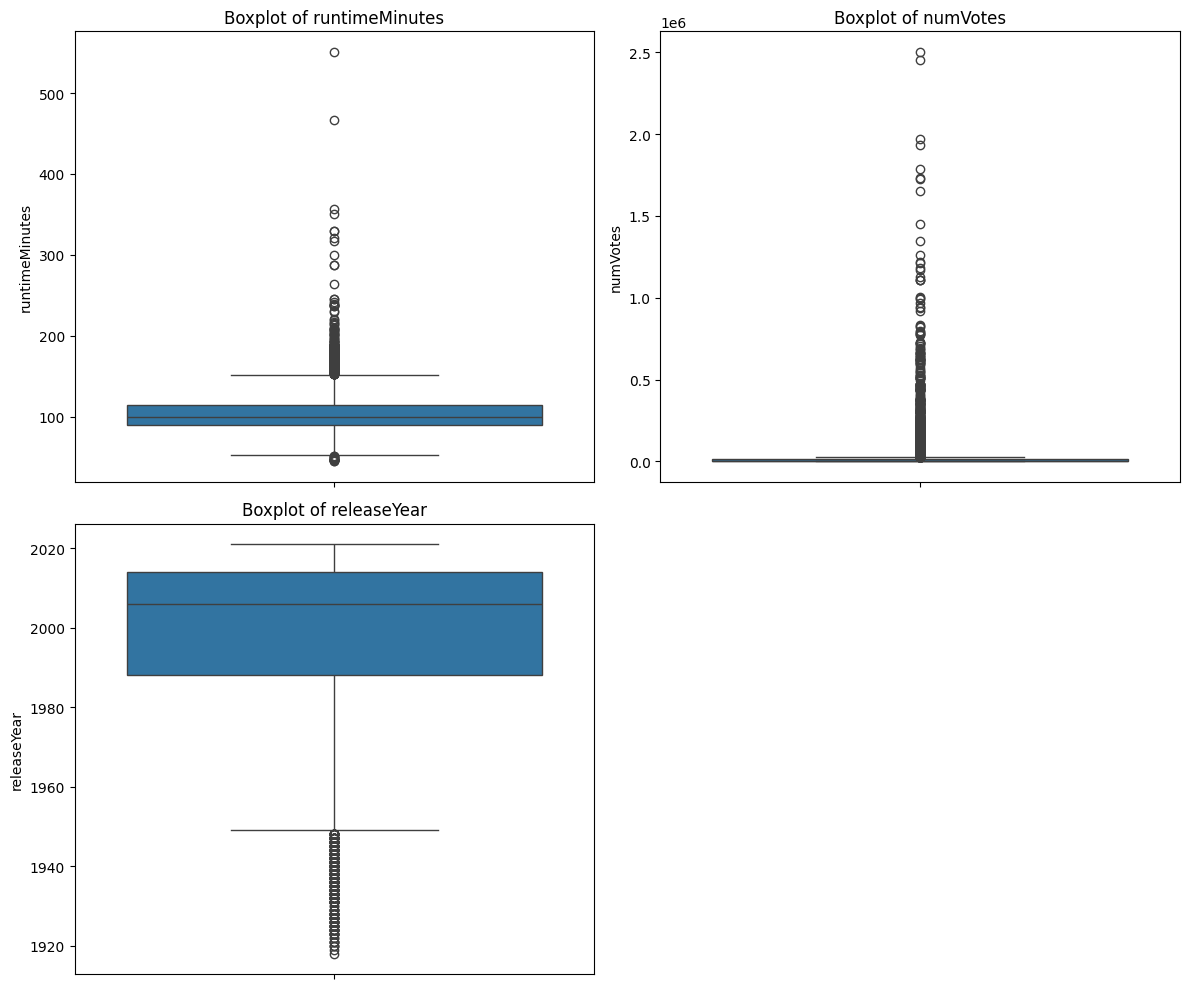

,Column,Data Type,Total Values,Missing Values,Missing %,Unique Values,Duplicate Count,IQR Outliers,MAD Outliers,Trimmed Mean,Sample Values
0,originalTitle,string[python],7959,3988,50.11,3944,27,N/A,N/A,N/A,"[le roman de renard, waterloo bridge, little w..."
1,numVotes,Int64,7959,790,9.93,5118,2051,1098,1916,7503.502702,"[1042, 107475, 1646, 1364, 2828]"
2,runtimeMinutes,Int64,7959,13,0.16,185,7761,448,1061,102.495282,"[105, 95, 81, 63, 85]"
3,primaryTitle,string[python],7959,0,0.00,7845,114,N/A,N/A,N/A,"[peter pan, the gold rush, the little colonel,..."
4,tconst,string[python],7959,0,0.00,7959,0,N/A,N/A,N/A,"[tt0015224, tt0015864, tt0016029, tt0021309, t..."
5,label,bool,7959,0,0.00,2,7957,N/A,N/A,N/A,"[True, False]"
6,releaseYear,int64,7959,0,0.00,104,7855,376,1289,2001.650338,"[1924, 1925, 1935, 1937, 1931]"


In [39]:
data_quality_report_v2 = utilities.analyze_data_quality(df_cleaned_v2)

display(data_quality_report_v2)

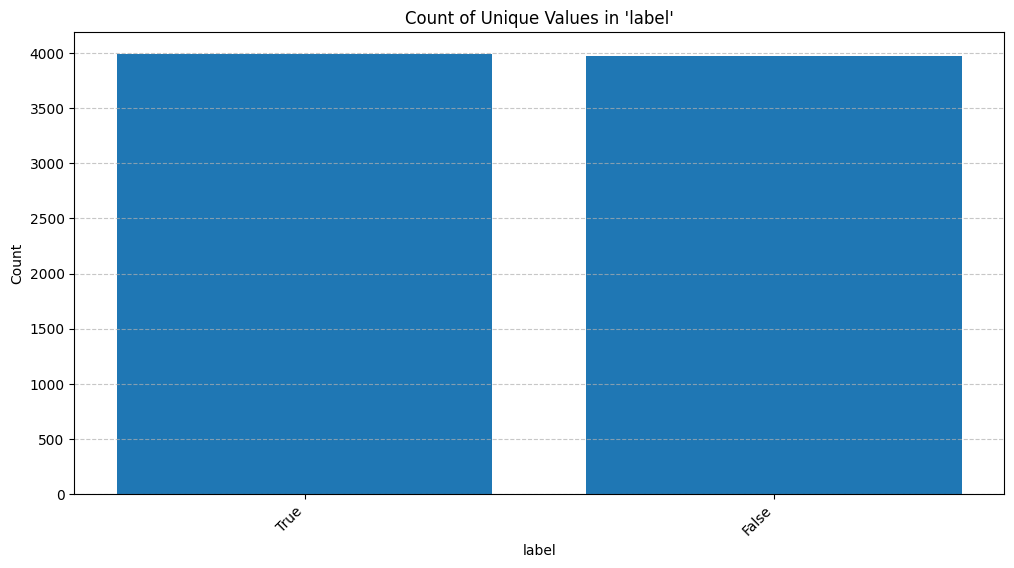

In [ ]:
utilities.plot_categorical_counts(df_cleaned_v1, 'label')

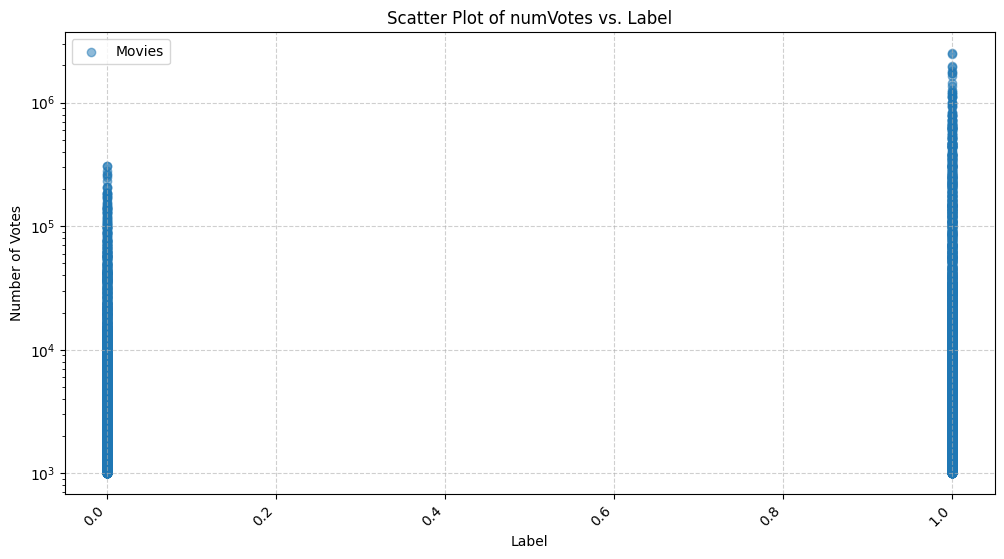

In [ ]:
# Generate a scatter plot for numVotes vs. movie index

def plot_numVotes_vs_label(df):
    """
    Plots a scatter plot of numVotes vs. label to visualize how votes are distributed 
    across different labels/categories.
    """
    df_filtered = df.dropna(subset=['numVotes', 'label'])  

    plt.figure(figsize=(12, 6))
    plt.scatter(df_filtered['label'], df_filtered['numVotes'], alpha=0.5, label="Movies")
    plt.xlabel("Label")
    plt.ylabel("Number of Votes")
    plt.title("Scatter Plot of numVotes vs. Label")
    plt.yscale("log") 
    plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

# Execute the function
plot_numVotes_vs_label(df_cleaned_v1)

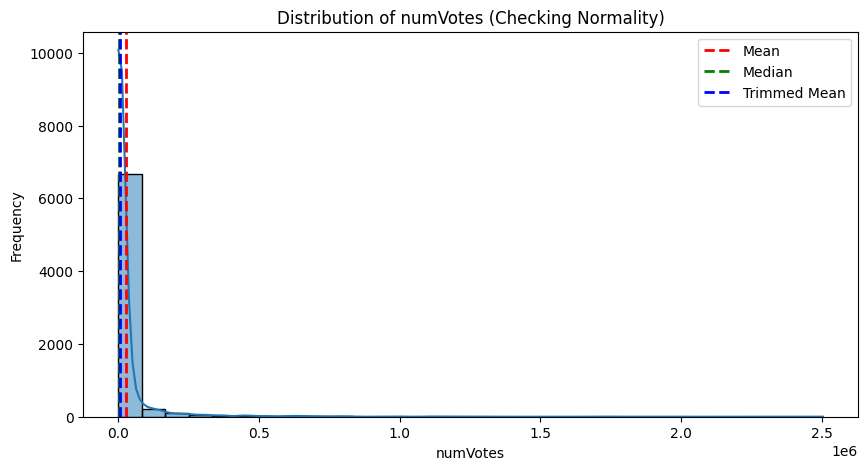

               Metric          Value
0                Mean   29520.510810
1  Standard Deviation  114449.993850
2              Median    3559.000000
3                 MAD    2250.000000
4        Trimmed Mean    7503.502702


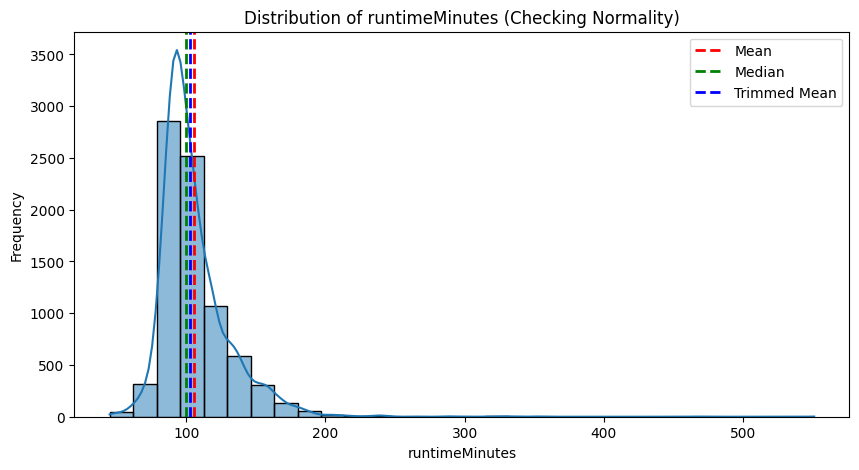

               Metric       Value
0                Mean  105.687138
1  Standard Deviation   25.396348
2              Median  100.000000
3                 MAD   11.000000
4        Trimmed Mean  102.495282


,tconst,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,numVotes,label
0,tt0015224,peter pan,<NA>,1924,<NA>,105,1042,True
2,tt0016029,the little colonel,<NA>,1935,<NA>,81,1646,True
5,tt0022485,tokyo chorus,<NA>,<NA>,1931,90,1364,True
6,tt0022550,waterloo bridge,waterloo bridge,1931,<NA>,81,2828,True
7,tt0022802,the dark horse,<NA>,1932,<NA>,75,1232,True
9,tt0023634,"i wás bớrn, bút...",<NA>,1932,<NA>,100,5332,True
10,tt0023686,whát pricé hớllywớớd?,<NA>,1932,<NA>,88,2294,True
11,tt0024188,islánd ớf lớst sớúls,<NA>,1932,<NA>,70,9091,True
13,tt0024617,the story of temple drake,the story of temple drake,<NA>,1933,70,1448,True
15,tt0024852,march of the wooden soldiers,<NA>,1934,<NA>,77,6625,True


In [ ]:


def analyze_and_clean_robust_statistics(df, column):
    """
    Analyzes robust and non-robust statistics for a given numeric column.
    Determines whether the data distribution is close to normal.
    Cleans the data based on the appropriate metrics (removing outliers).
    
    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The column to analyze.
    
    Returns:
        pd.DataFrame: Summary table comparing robust and non-robust statistics.
        pd.DataFrame: Cleaned DataFrame based on chosen metric.
    """
    # Drop missing values for the column
    df_filtered = df.dropna(subset=[column])
    
    # Compute non-robust statistics
    mean = df_filtered[column].mean()
    std_dev = df_filtered[column].std()
    
    # Compute robust statistics
    median = df_filtered[column].median()
    mad = stats.median_abs_deviation(df_filtered[column])
    trimmed_mean = stats.trim_mean(df_filtered[column], proportiontocut=0.1)

    # Create summary table
    stats_comparison = pd.DataFrame({
        "Metric": ["Mean", "Standard Deviation", "Median", "MAD", "Trimmed Mean"],
        "Value": [mean, std_dev, median, mad, trimmed_mean]
    })

    # Visualize Distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(df_filtered[column], bins=30, kde=True)
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label="Mean")
    plt.axvline(median, color='g', linestyle='dashed', linewidth=2, label="Median")
    plt.axvline(trimmed_mean, color='b', linestyle='dashed', linewidth=2, label="Trimmed Mean")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {column} (Checking Normality)")
    plt.legend()
    plt.show()

    # Check normality using the Shapiro-Wilk test (valid for n < 5000)
    if len(df_filtered) < 5000:
        shapiro_test = stats.shapiro(df_filtered[column])
        normality_p_value = shapiro_test.pvalue
    else:
        normality_p_value = stats.normaltest(df_filtered[column]).pvalue  # Alternative test for large n

    is_normal = normality_p_value > 0.05  # If p > 0.05, data is approximately normal

    # Cleaning the data based on normality
    if is_normal:
        # Use non-robust metrics: Remove outliers based on mean & std deviation
        lower_bound = mean - 3 * std_dev
        upper_bound = mean + 3 * std_dev
        df_cleaned = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]
    else:
        # Use robust metrics: Remove outliers based on MAD
        mad_threshold = 3
        lower_bound = median - mad_threshold * mad
        upper_bound = median + mad_threshold * mad
        df_cleaned = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

    # Display summary table
    print(stats_comparison)

    return df_cleaned

# Analyze and clean 'numVotes'
df_cleaned_numVotes = analyze_and_clean_robust_statistics(df_cleaned_v1, "numVotes")

# Analyze and clean 'runtimeMinutes'
df_cleaned_runtime = analyze_and_clean_robust_statistics(df_cleaned_v1, "runtimeMinutes")

# Merging the cleaned data for output
df_final_cleaned = df_cleaned_v1[df_cleaned_v1.index.isin(df_cleaned_numVotes.index) & df_cleaned_v1.index.isin(df_cleaned_runtime.index)]

# Display final cleaned DataFrame
df_final_cleaned.head(10)


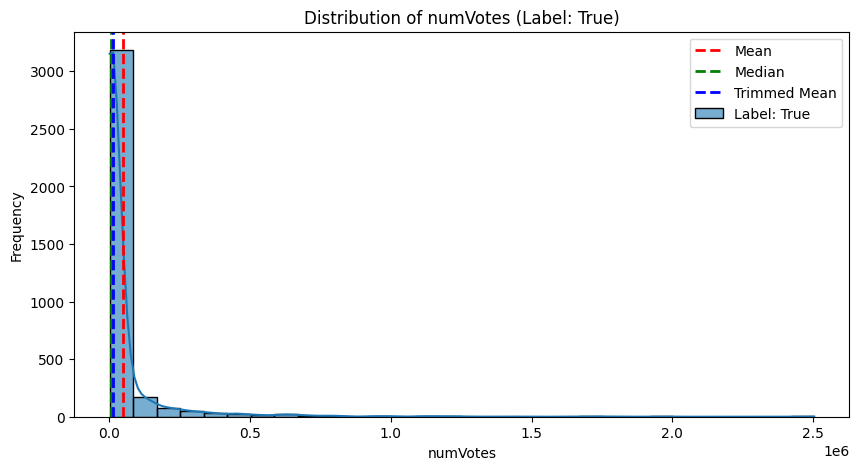

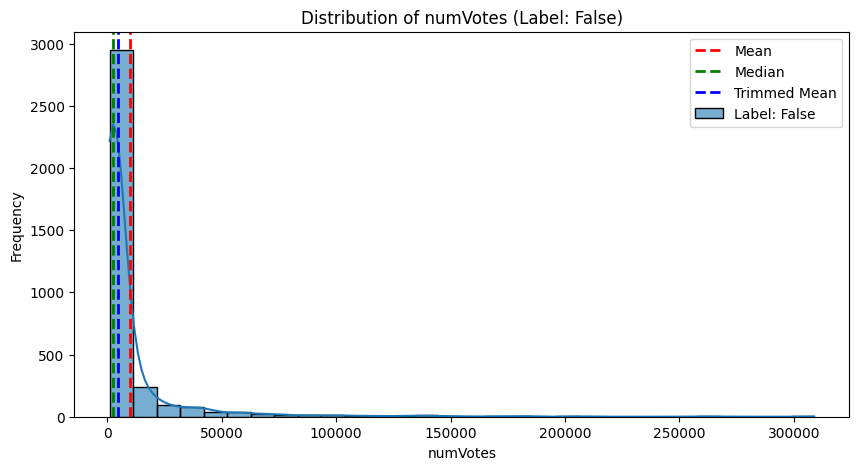

   Label              Metric          Value
0   True                Mean   48710.309247
1   True  Standard Deviation  157136.646047
2   True              Median    5127.000000
3   True                 MAD    3710.000000
4   True        Trimmed Mean   13328.651903
5  False                Mean   10033.990723
6  False  Standard Deviation   24003.597660
7  False              Median    2688.000000
8  False                 MAD    1445.000000
9  False        Trimmed Mean    4452.020372


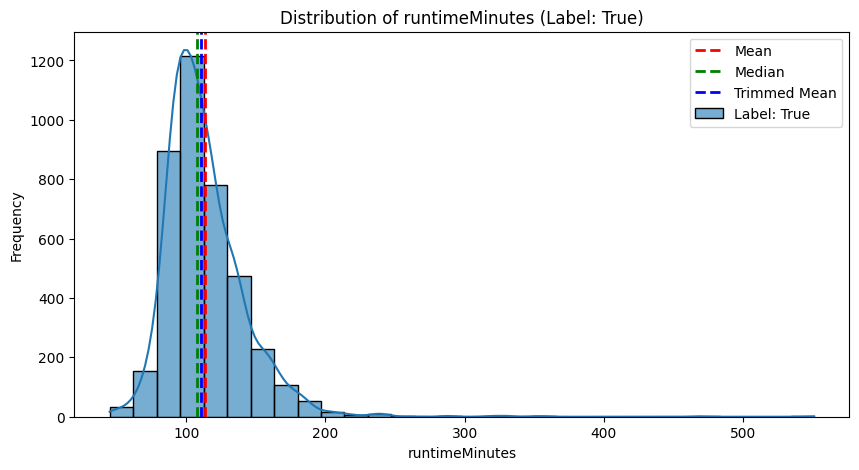

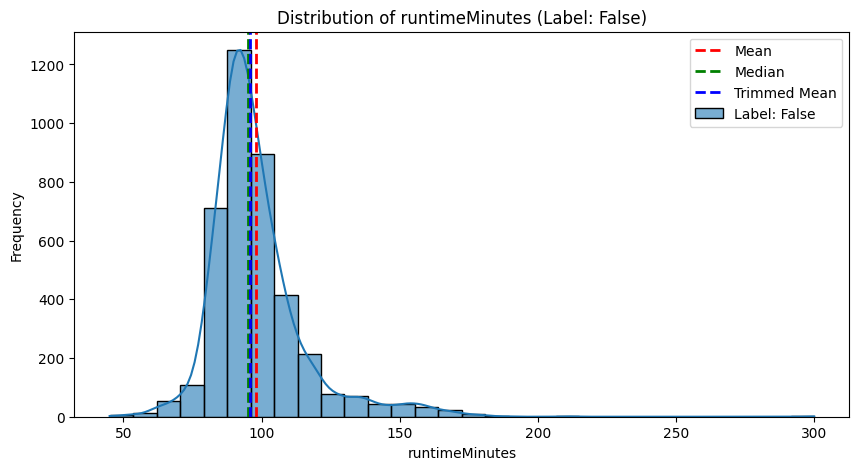

   Label              Metric       Value
0   True                Mean  113.341029
1   True  Standard Deviation   29.521985
2   True              Median  108.000000
3   True                 MAD   15.000000
4   True        Trimmed Mean  110.402320
5  False                Mean   97.986872
6  False  Standard Deviation   17.289596
7  False              Median   95.000000
8  False                 MAD    7.000000
9  False        Trimmed Mean   95.772799


In [ ]:
def analyze_and_clean_robust_statistics_by_label(df, column):
    """
    Analyzes robust and non-robust statistics for a given numeric column,
    considering 'label' as a grouping factor (True/False). It also visualizes
    the distributions for both label categories.
    """

    # Drop missing values for the column
    df_filtered = df.dropna(subset=[column, 'label'])

    results = []

    # Process separately for each label category (True/False)
    for label_value in df_filtered['label'].unique():
        subset = df_filtered[df_filtered['label'] == label_value]

        # Compute non-robust statistics
        mean = subset[column].mean()
        std_dev = subset[column].std()

        # Compute robust statistics
        median = subset[column].median()
        mad = stats.median_abs_deviation(subset[column])
        trimmed_mean = stats.trim_mean(subset[column], proportiontocut=0.1)

        # Append results
        results.append({
            "Label": label_value,
            "Metric": "Mean",
            "Value": mean
        })
        results.append({
            "Label": label_value,
            "Metric": "Standard Deviation",
            "Value": std_dev
        })
        results.append({
            "Label": label_value,
            "Metric": "Median",
            "Value": median
        })
        results.append({
            "Label": label_value,
            "Metric": "MAD",
            "Value": mad
        })
        results.append({
            "Label": label_value,
            "Metric": "Trimmed Mean",
            "Value": trimmed_mean
        })

        # Visualize Distribution
        plt.figure(figsize=(10, 5))
        sns.histplot(subset[column], bins=30, kde=True, label=f"Label: {label_value}", alpha=0.6)
        plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label="Mean")
        plt.axvline(median, color='g', linestyle='dashed', linewidth=2, label="Median")
        plt.axvline(trimmed_mean, color='b', linestyle='dashed', linewidth=2, label="Trimmed Mean")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.title(f"Distribution of {column} (Label: {label_value})")
        plt.legend()
        plt.show()

    # Convert to DataFrame
    stats_comparison = pd.DataFrame(results)

    # Display summary table
    print(stats_comparison)

    return stats_comparison

# Analyze 'numVotes' by label
stats_numVotes_by_label = analyze_and_clean_robust_statistics_by_label(df_cleaned_v1, "numVotes")

# Analyze 'runtimeMinutes' by label
stats_runtime_by_label = analyze_and_clean_robust_statistics_by_label(df_cleaned_v1, "runtimeMinutes")


# Primary Title

In [71]:
df_cleaned_v3 = df_cleaned_v2.copy()

### Character count or word count of the title.
Extremely short or extremely long titles might correlate with certain genres, which in turn could affect ratings. Probably longer titles for documentary (find the paper on that)

In [72]:
df_cleaned_v3['title_length'] = df_cleaned_v3['primaryTitle'].apply(lambda x: len(x.replace(' ', '')) if isinstance(x, str) else 0)
df_cleaned_v3.head(10)

,tconst,primaryTitle,originalTitle,runtimeMinutes,numVotes,label,releaseYear,title_length
0,tt0015224,peter pan,<NA>,105,1042,True,1924,8
1,tt0015864,the gold rush,<NA>,95,107475,True,1925,11
2,tt0016029,the little colonel,<NA>,81,1646,True,1935,16
3,tt0021309,the story of the fox,le roman de renard,63,<NA>,True,1937,16
4,tt0022395,the skin game,<NA>,85,<NA>,False,1931,11
5,tt0022485,tokyo chorus,<NA>,90,1364,True,1931,11
6,tt0022550,waterloo bridge,waterloo bridge,81,2828,True,1931,14
7,tt0022802,the dark horse,<NA>,75,1232,True,1932,12
8,tt0022913,freaks,<NA>,64,44794,True,1932,6
9,tt0023634,"i wás bớrn, bút...",<NA>,100,5332,True,1932,15


### TF-IDF
Extremely short or extremely long titles might correlate with certain genres, which in turn could affect ratings. Probably longer titles for documentary (find the paper on that)

In [73]:
def fingerprint_keying(text):
    """
    Applies "Fingerprint" Keying to normalize text by:
    1. Removing surrounding whitespace.
    2. Converting to lowercase.
    3. Removing punctuation and control characters.
    4. Converting characters to their ASCII equivalents.
    5. Tokenizing (splitting by whitespace).
    6. Sorting and deduplicating tokens.
    """
    if pd.isna(text) or not isinstance(text, str):
        return None  # Return None for missing or invalid data

    # Step 1: Trim whitespace
    text = text.strip()

    # Step 2: Convert to lowercase
    text = text.lower()

    # Step 3: Remove punctuation and control characters
    text = ''.join(
        char for char in text
        if (char not in string.punctuation
            and unicodedata.category(char)[0] != 'C')
    )

    # Step 4: Convert to ASCII equivalent (normalize Unicode)
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')

    # Step 5: Tokenize (split by whitespace)
    tokens = text.split()

    return ' '.join(tokens)


In [74]:
def apply_fingerprint_keying(df, column):
    """
    Applies the fingerprint_keying function to a specific column in a DataFrame,
    creating a new column named f"{column}_fingerprint".
    """
    df = df.copy()
    df[f"{column}_fingerprint"] = df[column].apply(fingerprint_keying)
    return df


df_cleaned_tf_idf = apply_fingerprint_keying(df_cleaned_v3, 'primaryTitle')
df_cleaned_tf_idf.head()


,tconst,primaryTitle,originalTitle,runtimeMinutes,numVotes,label,releaseYear,title_length,primaryTitle_fingerprint
0,tt0015224,peter pan,<NA>,105,1042,True,1924,8,peter pan
1,tt0015864,the gold rush,<NA>,95,107475,True,1925,11,the gold rush
2,tt0016029,the little colonel,<NA>,81,1646,True,1935,16,the little colonel
3,tt0021309,the story of the fox,le roman de renard,63,<NA>,True,1937,16,the story of the fox
4,tt0022395,the skin game,<NA>,85,<NA>,False,1931,11,the skin game


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

def create_tfidf_features(df, text_column='primaryTitle_fingerprint', stop_words='english'):
    """
    Takes a DataFrame with a fingerprinted text column,
    builds TF-IDF vectors, and returns a new DataFrame with those features added.
    """
    texts = df[text_column].fillna('').tolist()
    
    vectorizer = TfidfVectorizer(stop_words=stop_words)
    
    # Fit and transform the entire corpus
    tfidf_matrix = vectorizer.fit_transform(texts)  # shape: (num_samples, num_features)
    
    # Convert to DataFrame
    tfidf_features = pd.DataFrame(tfidf_matrix.toarray(),
                                  columns=vectorizer.get_feature_names_out())
    
    # Concatenate TF-IDF columns to the original df
    return pd.concat([df.reset_index(drop=True), tfidf_features.reset_index(drop=True)], axis=1)


df_cleaned_tf_idf = create_tfidf_features(df_cleaned_tf_idf, text_column='primaryTitle_fingerprint')
df_cleaned_tf_idf.head()


,tconst,primaryTitle,originalTitle,runtimeMinutes,numVotes,label,releaseYear,title_length,primaryTitle_fingerprint,00,...,zoo,zoom,zootopia,zorba,zorro,zpg,zucchini,zulfiqar,zulu,zyada
0,tt0015224,peter pan,<NA>,105,1042,True,1924,8,peter pan,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tt0015864,the gold rush,<NA>,95,107475,True,1925,11,the gold rush,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tt0016029,the little colonel,<NA>,81,1646,True,1935,16,the little colonel,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tt0021309,the story of the fox,le roman de renard,63,<NA>,True,1937,16,the story of the fox,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tt0022395,the skin game,<NA>,85,<NA>,False,1931,11,the skin game,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Embeddings

In [84]:
def embedding_text_clean(text):
    """
    Minimal text cleaning suitable for neural embeddings.
    1. Strips leading/trailing whitespace.
    2. Converts to lowercase.
    3. Removes "control" characters (invisible, non-printable),
       but retains typical punctuation
    4. Normalizes Unicode to ASCII.
    
    Returns the cleaned string with original word order preserved.
    """
    if pd.isna(text) or not isinstance(text, str):
        return None  # Return None for missing or invalid data
    
    # 1) Strip leading/trailing whitespace
    text = text.strip()
    
    # 2) Lowercase
    text = text.lower()
    
    # 3) Remove "control" characters but keep punctuation
    # 'C' stands for control character category in Unicode.
    # We'll filter out those but keep normal ASCII punctuation.
    cleaned = []
    for char in text:
        if unicodedata.category(char)[0] != 'C':
            cleaned.append(char)
    text = ''.join(cleaned)
    
    # 4) Convert to ASCII 
    text = unicodedata.normalize('NFKD', text).encode('ascii','ignore').decode('utf-8')
    
    # Return text "as is" without reordering or removing duplicates
    return text

def apply_embedding_clean(df, column):
    """
    Applies the minimal embedding_text_clean function to a specific column,
    storing the result in a new column <column>_embedding.
    """
    df = df.copy()
    new_col = f"{column}_embedding"
    df[new_col] = df[column].apply(embedding_text_clean)
    return df

df_cleaned_embedding = apply_embedding_clean(df_cleaned_v3, 'primaryTitle')
df_cleaned_embedding.head(10)

,tconst,primaryTitle,originalTitle,runtimeMinutes,numVotes,label,releaseYear,title_length,primaryTitle_embedding
0,tt0015224,peter pan,<NA>,105,1042,True,1924,8,peter pan
1,tt0015864,the gold rush,<NA>,95,107475,True,1925,11,the gold rush
2,tt0016029,the little colonel,<NA>,81,1646,True,1935,16,the little colonel
3,tt0021309,the story of the fox,le roman de renard,63,<NA>,True,1937,16,the story of the fox
4,tt0022395,the skin game,<NA>,85,<NA>,False,1931,11,the skin game
5,tt0022485,tokyo chorus,<NA>,90,1364,True,1931,11,tokyo chorus
6,tt0022550,waterloo bridge,waterloo bridge,81,2828,True,1931,14,waterloo bridge
7,tt0022802,the dark horse,<NA>,75,1232,True,1932,12,the dark horse
8,tt0022913,freaks,<NA>,64,44794,True,1932,6,freaks
9,tt0023634,"i wás bớrn, bút...",<NA>,100,5332,True,1932,15,"i was born, but..."


In [85]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df_cleaned_embedding['primaryTitle_embedding'].fillna(''))

emb_df = pd.DataFrame(embeddings, 
                      columns=[f'emb_{i}' for i in range(embeddings.shape[1])])

df_embedded = pd.concat([df_cleaned_embedding.reset_index(drop=True), emb_df], axis=1)

df_embedded.head(10)

,tconst,primaryTitle,originalTitle,runtimeMinutes,numVotes,label,releaseYear,title_length,primaryTitle_embedding,emb_0,...,emb_374,emb_375,emb_376,emb_377,emb_378,emb_379,emb_380,emb_381,emb_382,emb_383
0,tt0015224,peter pan,<NA>,105,1042,True,1924,8,peter pan,-0.005195,...,0.007453,-0.016043,0.015832,0.030441,-0.001414,0.001115,0.026634,0.016538,0.010955,0.046307
1,tt0015864,the gold rush,<NA>,95,107475,True,1925,11,the gold rush,-0.050224,...,0.078961,-0.016140,-0.015534,0.015610,-0.049363,0.065408,0.026269,-0.098195,0.023678,0.086066
2,tt0016029,the little colonel,<NA>,81,1646,True,1935,16,the little colonel,0.000435,...,-0.015972,-0.013936,0.043872,0.039557,-0.072714,-0.030890,-0.020049,0.049154,0.072942,0.024553
3,tt0021309,the story of the fox,le roman de renard,63,<NA>,True,1937,16,the story of the fox,-0.021489,...,-0.002990,-0.045334,0.019020,-0.042490,-0.072505,-0.025035,0.039014,0.065448,0.062024,0.029154
4,tt0022395,the skin game,<NA>,85,<NA>,False,1931,11,the skin game,-0.024319,...,0.087683,-0.010340,0.001918,0.084414,-0.013420,0.022360,0.039852,-0.031831,-0.025012,0.076115
5,tt0022485,tokyo chorus,<NA>,90,1364,True,1931,11,tokyo chorus,-0.000070,...,-0.065378,0.035149,-0.002057,0.018477,-0.045111,0.029607,0.042877,0.009745,-0.055172,-0.059761
6,tt0022550,waterloo bridge,waterloo bridge,81,2828,True,1931,14,waterloo bridge,0.005213,...,-0.025646,0.112067,0.038580,-0.067978,-0.049904,0.005789,0.081650,0.019022,0.015570,-0.018659
7,tt0022802,the dark horse,<NA>,75,1232,True,1932,12,the dark horse,-0.043785,...,0.015230,-0.026846,0.015554,0.061009,-0.133579,-0.000193,0.029932,-0.011925,0.042084,0.036248
8,tt0022913,freaks,<NA>,64,44794,True,1932,6,freaks,-0.049609,...,0.061516,-0.107948,-0.025546,0.014227,-0.031925,0.031902,0.109108,0.008153,-0.002038,0.024849
9,tt0023634,"i wás bớrn, bút...",<NA>,100,5332,True,1932,15,"i was born, but...",-0.012795,...,0.074417,0.041569,-0.061951,0.015121,-0.024550,0.046388,0.050476,0.015006,0.010621,-0.058863
